In [1]:
#### PCA Test ####
gc()

#設定工作目錄
setwd("/Users/huangyiling/GitHub/EB101_TeamSpade_project/DataModel/people_Model4")

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,519217,27.8,1162317,62.1,642320,34.4
Vcells,985607,7.6,8388608,64.0,1774282,13.6


In [2]:
# 安裝必要套件
# install.packages("factoextra")
# install.packages("FactoMineR")
# install.packages("ade4")
# install.packages("magrittr")
# install.packages("ggplot2")

In [3]:
# 載入必要套件
library(ade4)
library(factoextra)
library(FactoMineR)
library(ggplot2)
library(magrittr)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Attaching package: ‘FactoMineR’

The following object is masked from ‘package:ade4’:

    reconst



In [4]:
# 載入資料
data_all<-read.csv("peopleSample2.csv")
head(data_all)

X,Sex,Age,Height,Weight,BMI,Calories,Moisture,Protein,Saturated_fat,...,Zn,P,VitaminA,VitaminE,VitaminB_group,VitaminC,Fatty_acid_S,Fatty_acid_M,Fatty_acid_P,Cholesterol
0,0,19,140,31.4,16,1408.4,942,34.5,140.8,...,12,800,500,12,20.59,100,140.8,84.5,12.7,300
1,0,19,141,31.8,16,1425.1,954,35.0,142.5,...,12,800,500,12,20.59,100,142.5,85.5,12.8,300
2,0,19,142,32.3,16,1445.4,969,35.5,144.5,...,12,800,500,12,20.59,100,144.5,86.7,13.0,300
3,0,19,143,32.7,16,1462.1,981,36.0,146.2,...,12,800,500,12,20.59,100,146.2,87.7,13.2,300
4,0,19,144,33.2,16,1482.3,996,36.5,148.2,...,12,800,500,12,20.59,100,148.2,88.9,13.3,300
5,0,19,145,33.6,16,1498.8,1008,37.0,149.9,...,12,800,500,12,20.59,100,149.9,89.9,13.5,300


In [5]:
# 查看 data 資料結構
str(data_all)

'data.frame':	91200 obs. of  27 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Sex           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Age           : int  19 19 19 19 19 19 19 19 19 19 ...
 $ Height        : int  140 141 142 143 144 145 146 147 148 149 ...
 $ Weight        : num  31.4 31.8 32.3 32.7 33.2 33.6 34.1 34.6 35 35.5 ...
 $ BMI           : int  16 16 16 16 16 16 16 16 16 16 ...
 $ Calories      : num  1408 1425 1445 1462 1482 ...
 $ Moisture      : num  942 954 969 981 996 ...
 $ Protein       : num  34.5 35 35.5 36 36.5 37 37.5 38.1 38.5 39.1 ...
 $ Saturated_fat : num  141 142 144 146 148 ...
 $ Carbohydrate  : num  817 827 838 848 860 ...
 $ Dietary_fiber : int  27 27 27 27 27 27 27 27 27 27 ...
 $ Na            : int  2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 ...
 $ K             : int  4700 4700 4700 4700 4700 4700 4700 4700 4700 4700 ...
 $ Ca            : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Mg            : int  320 320 320 320 

In [6]:
data<-data_all[,c(7,8,9,10,11,12,16,17,18,20,22,24,25,26)]
data

Calories,Moisture,Protein,Saturated_fat,Carbohydrate,Dietary_fiber,Mg,Fe,Zn,VitaminA,VitaminB_group,Fatty_acid_S,Fatty_acid_M,Fatty_acid_P
1408.4,942,34.5,140.8,816.9,27,320,15,12,500,20.59,140.8,84.5,12.7
1425.1,954,35.0,142.5,826.6,27,320,15,12,500,20.59,142.5,85.5,12.8
1445.4,969,35.5,144.5,838.3,27,320,15,12,500,20.59,144.5,86.7,13.0
1462.1,981,36.0,146.2,848.0,27,320,15,12,500,20.59,146.2,87.7,13.2
1482.3,996,36.5,148.2,859.7,27,320,15,12,500,20.59,148.2,88.9,13.3
1498.8,1008,37.0,149.9,869.3,27,320,15,12,500,20.59,149.9,89.9,13.5
1518.9,1023,37.5,151.9,881.0,27,320,15,12,500,20.59,151.9,91.1,13.7
1538.9,1038,38.1,153.9,892.6,27,320,15,12,500,20.59,153.9,92.3,13.9
1555.4,1050,38.5,155.5,902.1,27,320,15,12,500,20.59,155.5,93.3,14.0
1575.3,1065,39.1,157.5,913.7,27,320,15,12,500,20.59,157.5,94.5,14.2


In [7]:
# 主成分分析（保留 5 個主成分） dudi會先正規化
data.pca <- dudi.pca(df = data, scannf = FALSE, nf = 4)
data.pca

Duality diagramm
class: pca dudi
$call: dudi.pca(df = data, scannf = FALSE, nf = 4)

$nf: 4 axis-components saved
$rank: 10
eigen values: 7.386 5.236 0.7243 0.5087 0.09084 ...
  vector length mode    content       
1 $cw    14     numeric column weights
2 $lw    91200  numeric row weights   
3 $eig   10     numeric eigen values  

  data.frame nrow  ncol content             
1 $tab       91200 14   modified array      
2 $li        91200 4    row coordinates     
3 $l1        91200 4    row normed scores   
4 $co        14    4    column coordinates  
5 $c1        14    4    column normed scores
other elements: cent norm 

In [8]:
# 取得每個主成分變異數（特徵值）
get_eig(data.pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.385699e+00,5.275499e+01,52.75499
Dim.2,5.236057e+00,3.740041e+01,90.15540
Dim.3,7.243386e-01,5.173848e+00,95.32925
Dim.4,5.087457e-01,3.633898e+00,98.96315
Dim.5,9.083802e-02,6.488430e-01,99.61199
Dim.6,5.023550e-02,3.588250e-01,99.97081
Dim.7,3.321969e-03,2.372835e-02,99.99454
Dim.8,6.895133e-04,4.925095e-03,99.99947
Dim.9,7.272975e-05,5.194982e-04,99.99999
Dim.10,1.876859e-06,1.340614e-05,100.00000


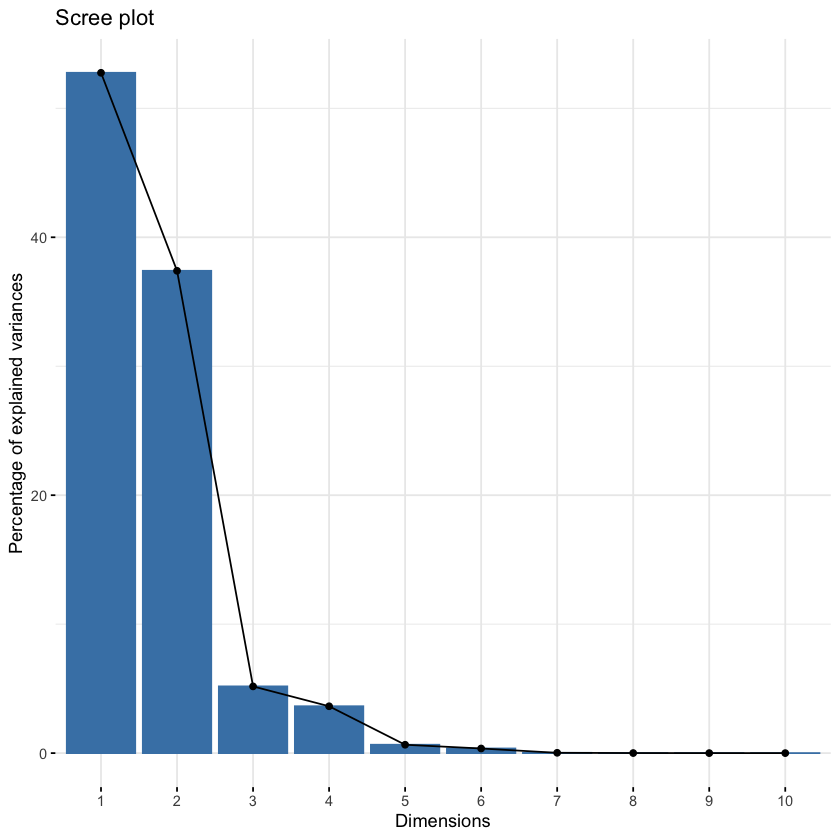

In [9]:
# 陡坡圖（Scree Plot）
fviz_eig(data.pca)

In [10]:
# modified array  
# data.pca$tab

In [11]:
# row coordinates 
tt = data.pca$li
str(tt)
write.csv(tt,"peopleSample_new.csv", row.names = TRUE)

'data.frame':	91200 obs. of  4 variables:
 $ Axis1: num  6.73 6.61 6.46 6.33 6.19 ...
 $ Axis2: num  -2.31 -2.31 -2.31 -2.31 -2.31 ...
 $ Axis3: num  0.725 0.736 0.751 0.763 0.777 ...
 $ Axis4: num  -1.15 -1.12 -1.08 -1.05 -1.01 ...


In [12]:
# row normed scores
data.pca$ll

NULL

In [13]:
data.pca$co

,Comp1,Comp2,Comp3,Comp4
Calories,-0.755125646,-0.002093693,0.239340107,0.60256814
Moisture,-0.962020507,-0.010789390,-0.134095873,-0.19865240
Protein,-0.954150337,-0.015327843,-0.168062370,-0.19497633
Saturated_fat,-0.997610407,-0.006136084,0.013425825,-0.01292504
Carbohydrate,-0.997611257,-0.006136056,0.013422671,-0.01293160
Dietary_fiber,-0.031615953,0.956508356,0.256475290,-0.07097114
Mg,-0.029585189,0.967049018,0.198972286,-0.04869430
Fe,-0.038336563,-0.646079135,0.717207559,-0.24332343
Zn,-0.007744724,0.994652851,0.007549119,-0.01558297
VitaminA,-0.007744724,0.994652851,0.007549119,-0.01558297


In [14]:
data.pca$cl

NULL

In [15]:
# 陡坡圖（Scree Plot）
# screeplot(data.pca)

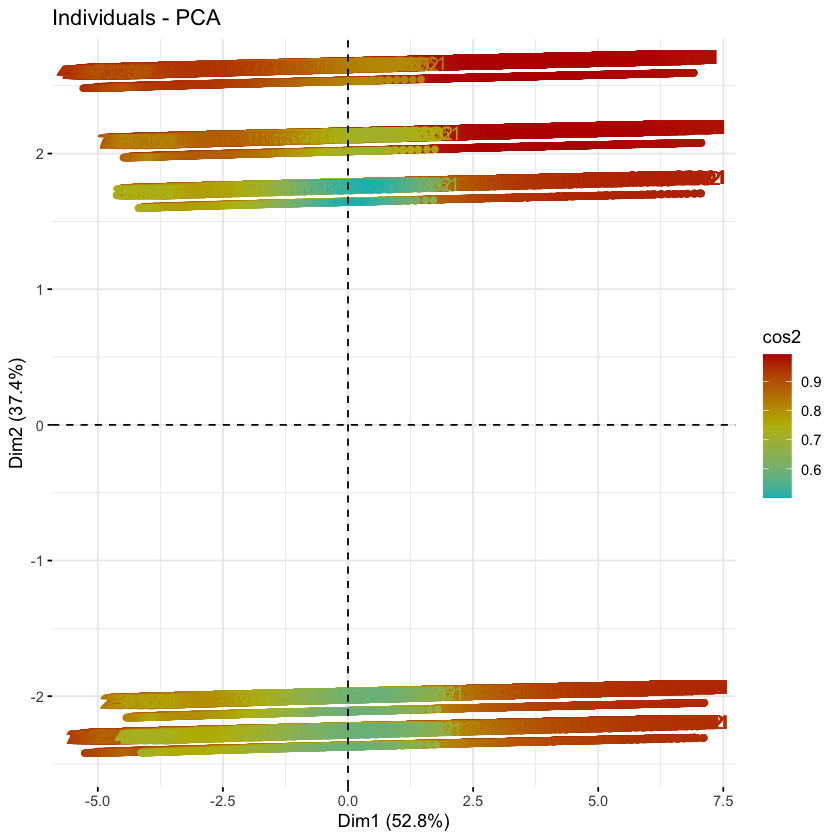

In [16]:
# 顯示每個個體在前兩個主成分上的分布圖
fviz_pca_ind(data.pca,
             col.ind = "cos2",           
             #repel = TRUE,               
             gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"))
# 依據主成分對該個體的重要性上色
# 避免文字重疊

In [17]:
# 個體相關資料
data.pca.ind <- get_pca_ind(data.pca)
data.pca.ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [18]:
data.pca.ind$coord   # 座標

Dim.1,Dim.2,Dim.3,Dim.4
6.729464,-2.307124,0.7245930,-1.1540882
6.610950,-2.308079,0.7359570,-1.1226211
6.460956,-2.309262,0.7510581,-1.0834615
6.330352,-2.310305,0.7629417,-1.0525914
6.192544,-2.311400,0.7774256,-1.0131281
6.062321,-2.312441,0.7891059,-0.9828352
5.912520,-2.313623,0.8040117,-0.9442621
5.761214,-2.314838,0.8178056,-0.9073661
5.647233,-2.315739,0.8298710,-0.8749665
5.496023,-2.316954,0.8435673,-0.8383637


In [19]:
ii =data.pca.ind$coord # 座標 
write.csv(ii, "peopleSample4_new.csv", row.names = TRUE)

In [20]:
data.pca.ind$contrib # 對主成分的貢獻度

Dim.1,Dim.2,Dim.3,Dim.4
0.0067231774,0.001114661,0.0007947888,2.870665e-03
0.0064884557,0.001115584,0.0008199142,2.716257e-03
0.0061973661,0.001116728,0.0008539070,2.530064e-03
0.0059493480,0.001117737,0.0008811426,2.387944e-03
0.0056931393,0.001118796,0.0009149160,2.212245e-03
0.0054562149,0.001119804,0.0009426144,2.081929e-03
0.0051898980,0.001120949,0.0009785618,1.921718e-03
0.0049276693,0.001122127,0.0010124269,1.774473e-03
0.0047346188,0.001123001,0.0010425208,1.650013e-03
0.0044844659,0.001124179,0.0010772165,1.514849e-03


In [21]:
data.pca.ind$cos2    # 主成分對該個體的重要性

Dim.1,Dim.2,Dim.3,Dim.4
0.8594417,0.1010177,0.009964228,0.0252774606
0.8561546,0.1043580,0.010610341,0.0246882800
0.8518018,0.1088157,0.011510444,0.0239536648
0.8476757,0.1129049,0.012312795,0.0234365448
0.8431481,0.1174670,0.013288726,0.0225680659
0.8384870,0.1220000,0.014206563,0.0220383904
0.8328413,0.1275270,0.015400746,0.0212423303
0.8266302,0.1334518,0.016656489,0.0205044609
0.8217467,0.1381802,0.017745480,0.0197264707
0.8146982,0.1447886,0.019192834,0.0189567802


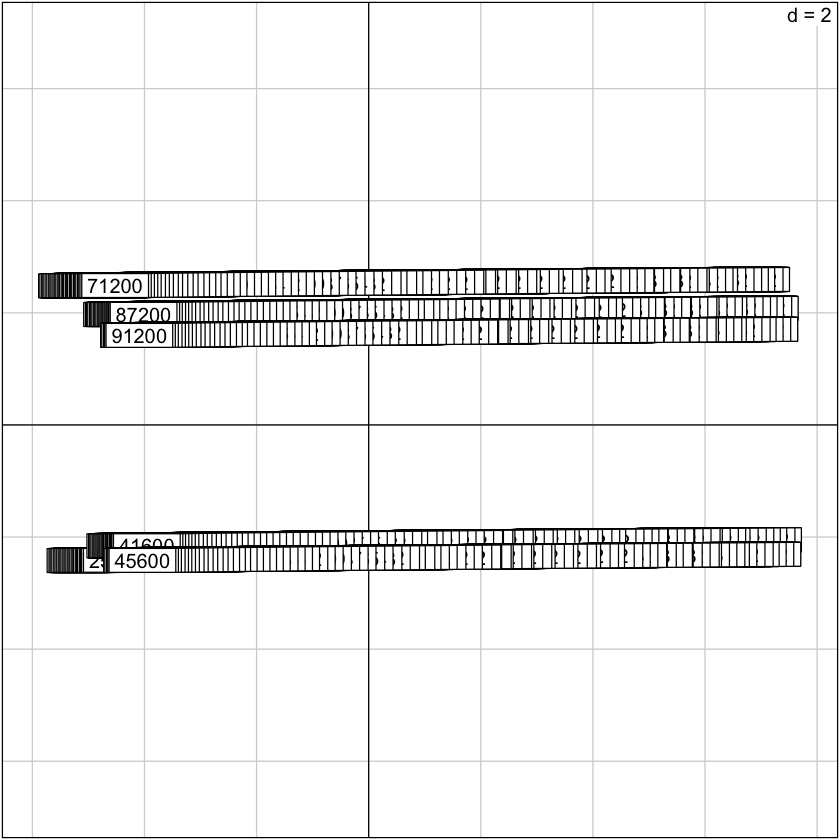

In [22]:
# 個體分布圖
s.label(data.pca$li,
        xax = 1,  # 主成分 1
        yax = 2)  # 主成分 2

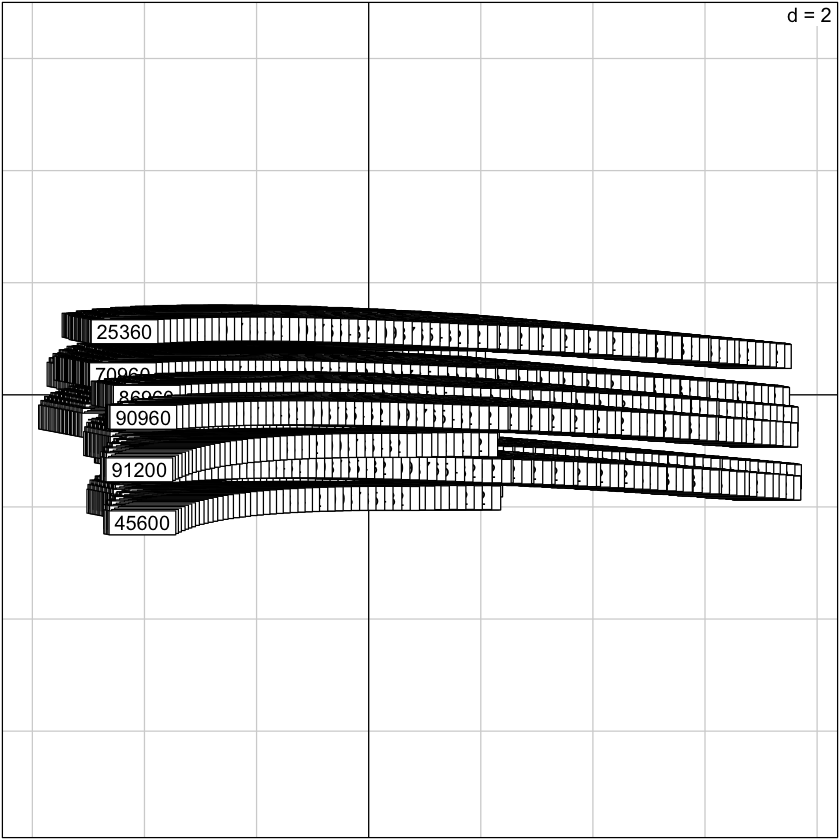

In [23]:
s.label(data.pca$li,
        xax = 1,  # 主成分 1
        yax = 3)  # 主成分 3

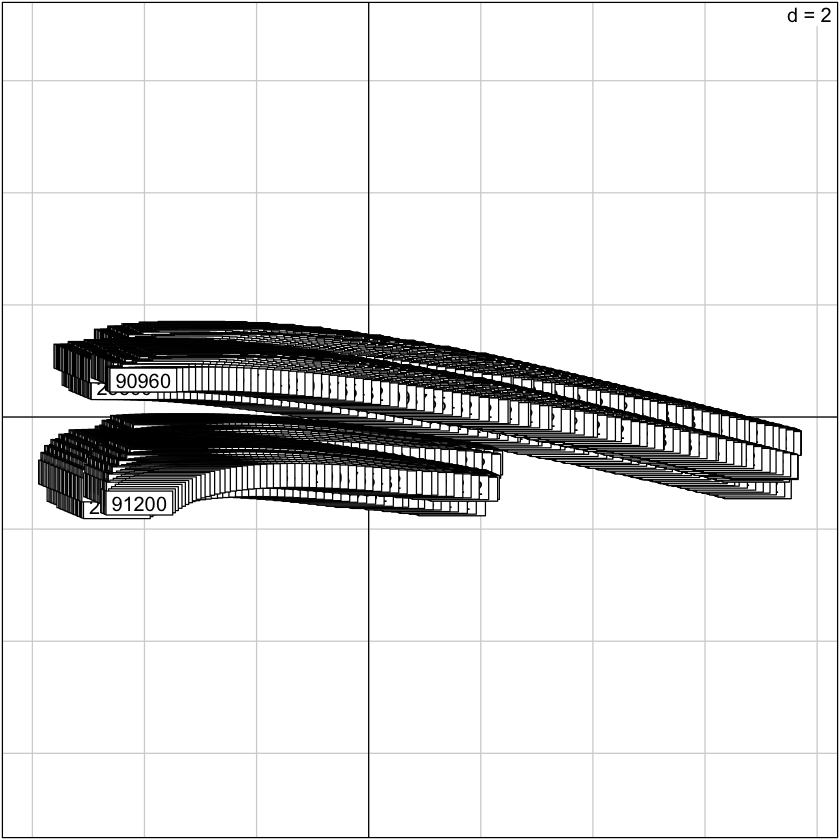

In [24]:
s.label(data.pca$li,
        xax = 1,  # 主成分 1
        yax = 4)  # 主成分 4

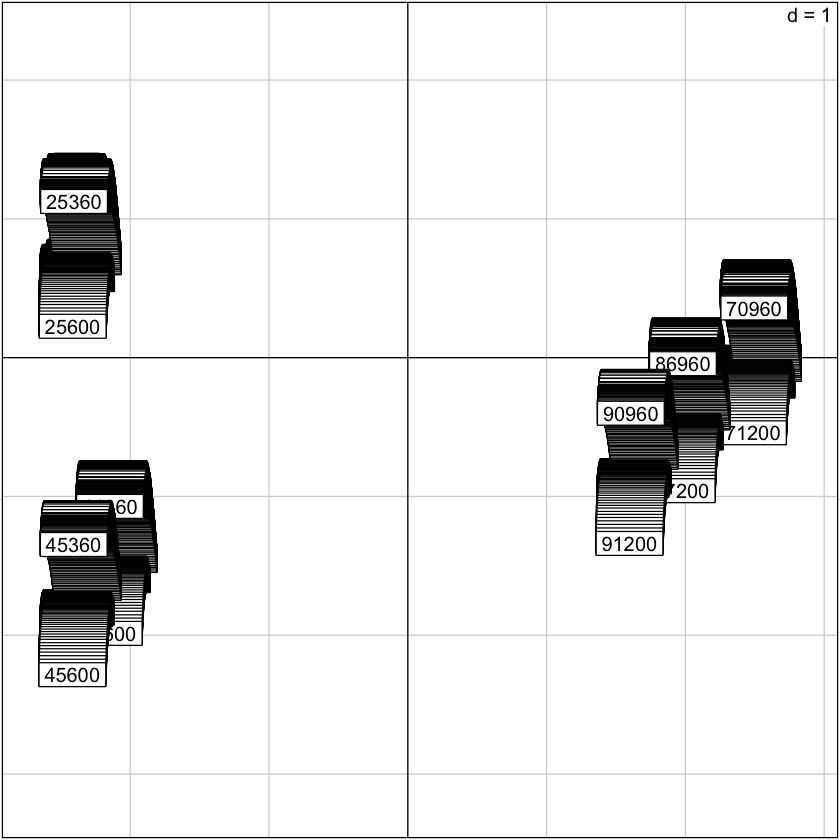

In [25]:
s.label(data.pca$li,
        xax = 2,  # 主成分 2
        yax = 3)  # 主成分 3

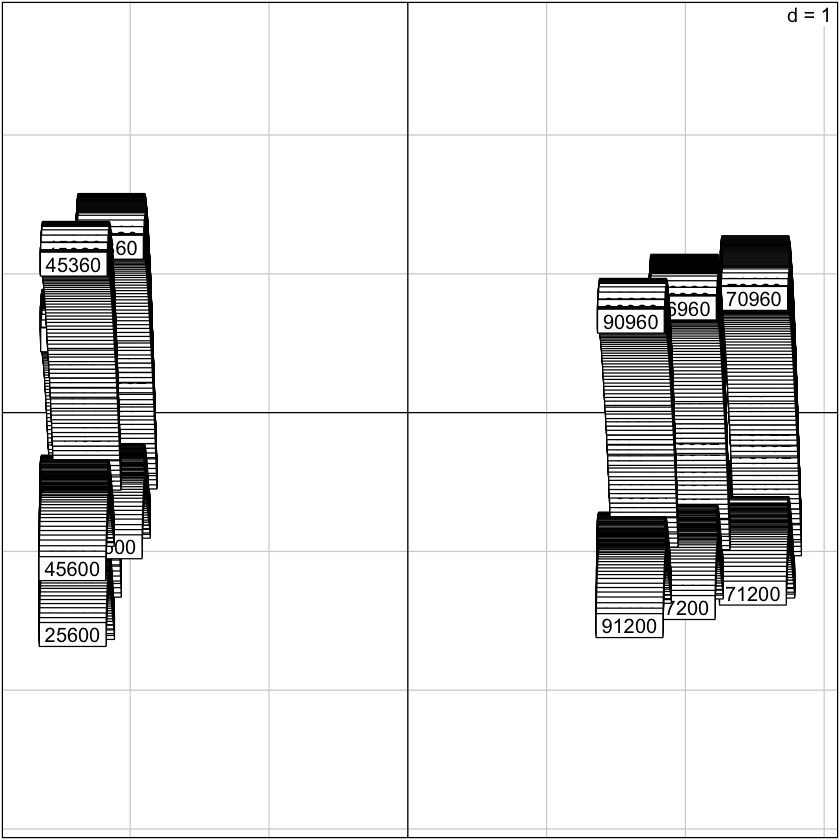

In [26]:
s.label(data.pca$li,
        xax = 2,  # 主成分 2
        yax = 4)  # 主成分 4

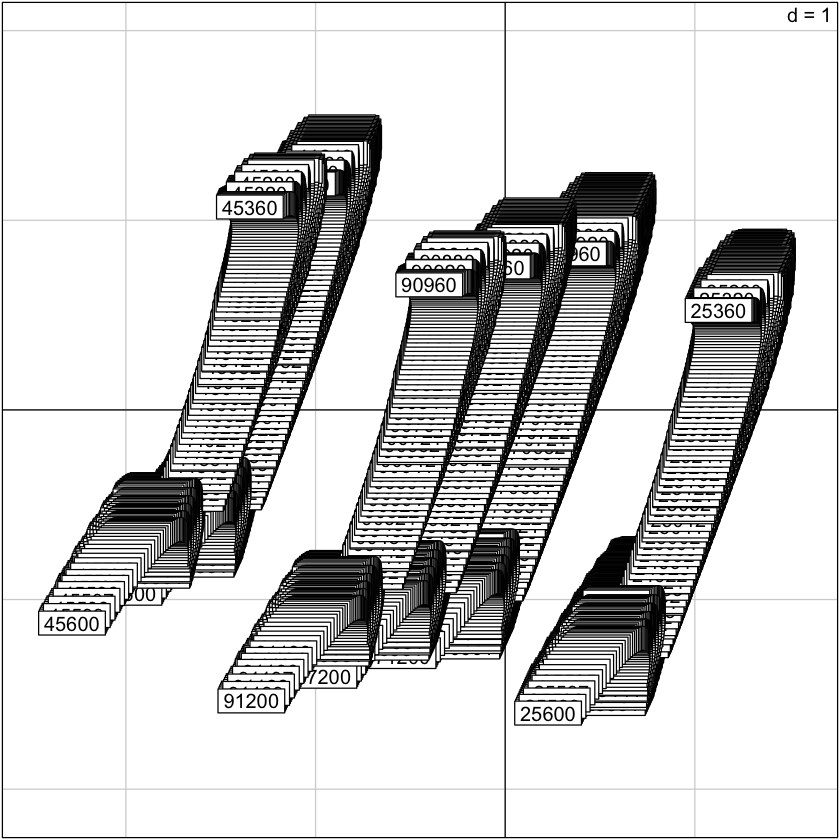

In [27]:
s.label(data.pca$li,
        xax = 3,  # 主成分 3
        yax = 4)  # 主成分 4

In [28]:
###############################

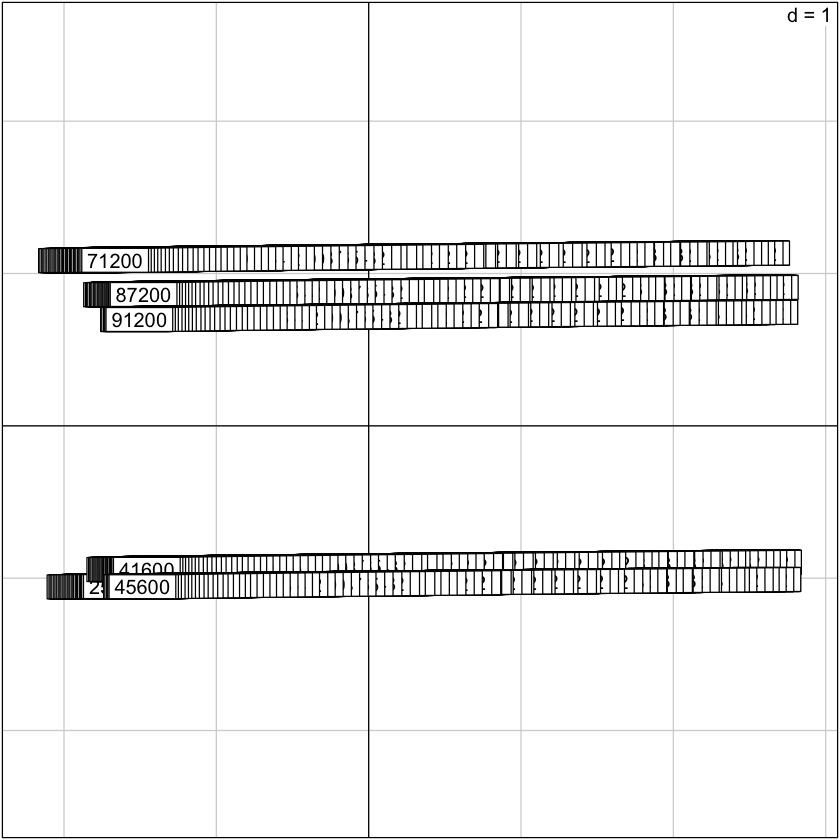

In [29]:
s.label(data.pca$l1,
        xax = 1,  # 主成分 1
        yax = 2)  # 主成分 2

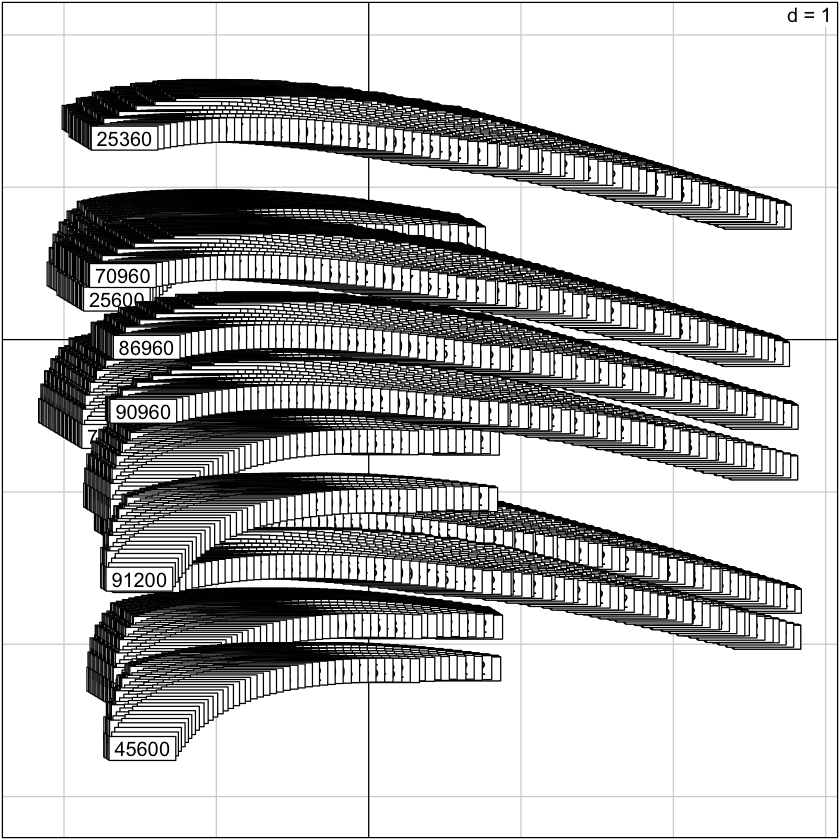

In [30]:
s.label(data.pca$l1,
        xax = 1,  # 主成分 1
        yax = 3)  # 主成分 3

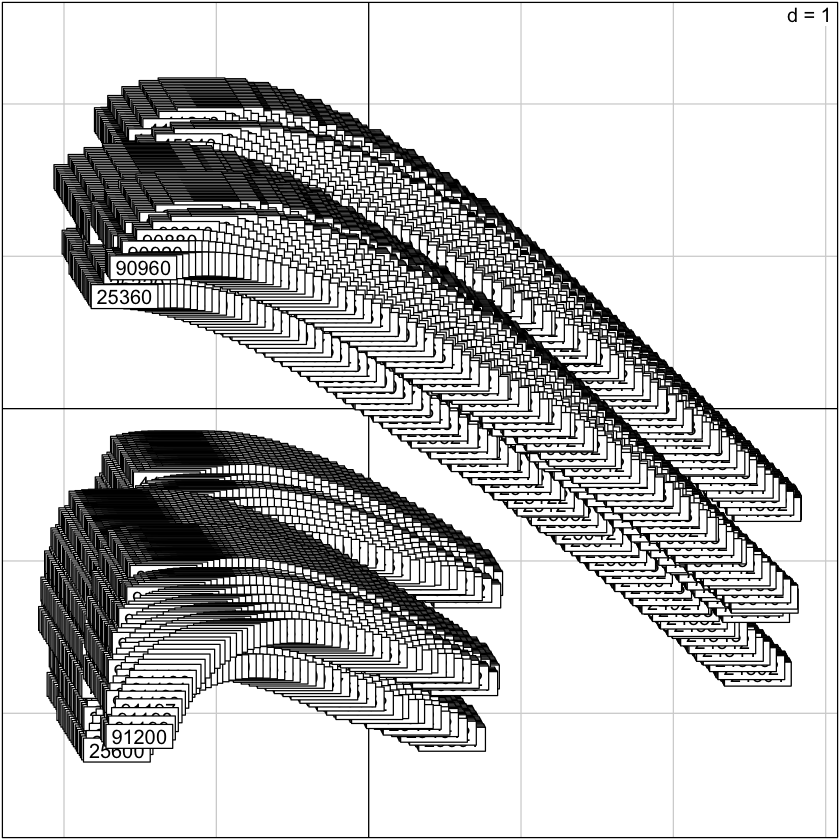

In [31]:
s.label(data.pca$l1,
        xax = 1,  # 主成分 1
        yax = 4)  # 主成分 4

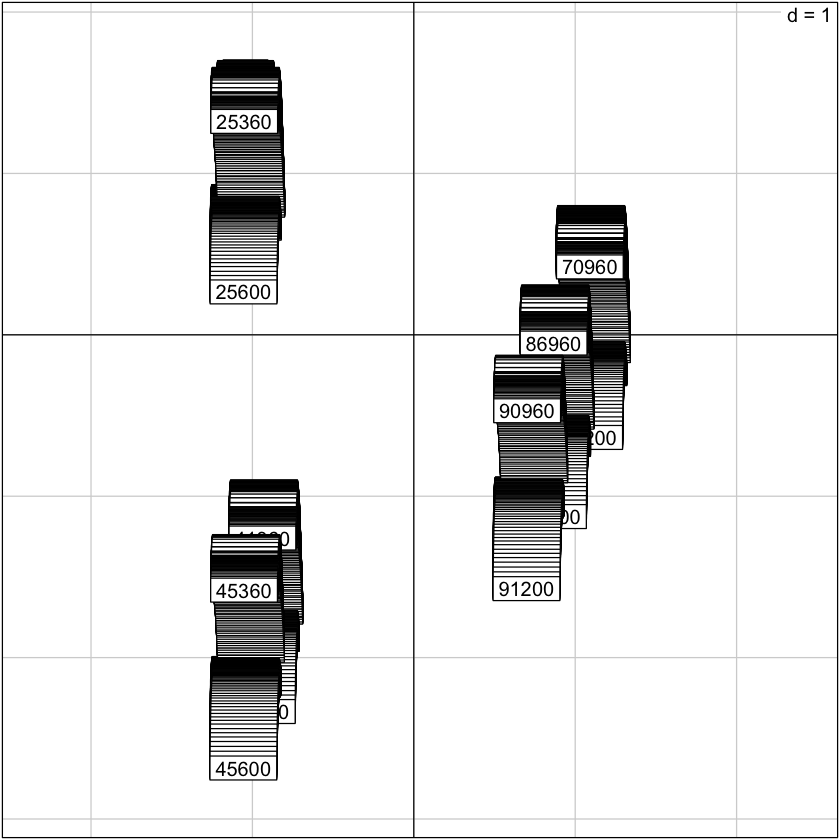

In [32]:
s.label(data.pca$l1,
        xax = 2,  # 主成分 2
        yax = 3)  # 主成分 3

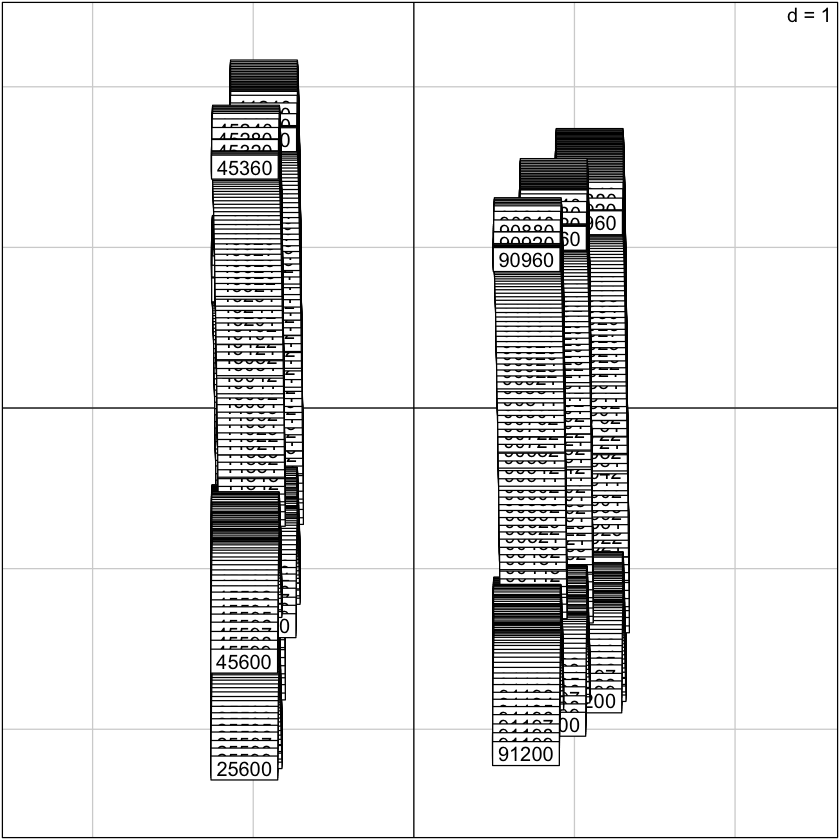

In [33]:
s.label(data.pca$l1,
        xax = 2,  # 主成分 2
        yax = 4)  # 主成分 4

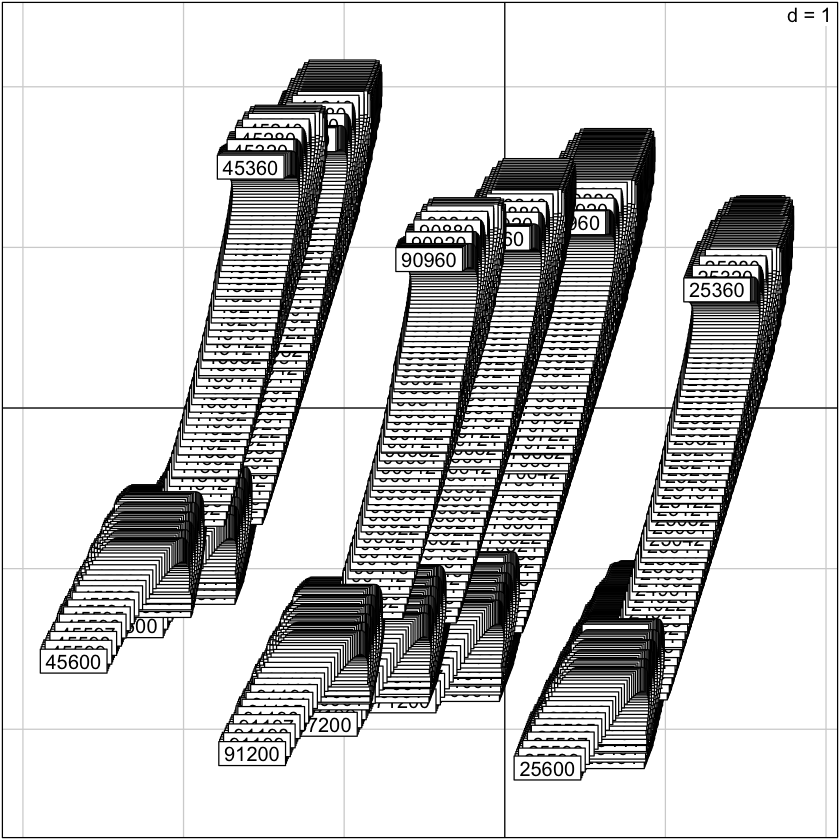

In [34]:
s.label(data.pca$l1,
        xax = 3,  # 主成分 3
        yax = 4)  # 主成分 4

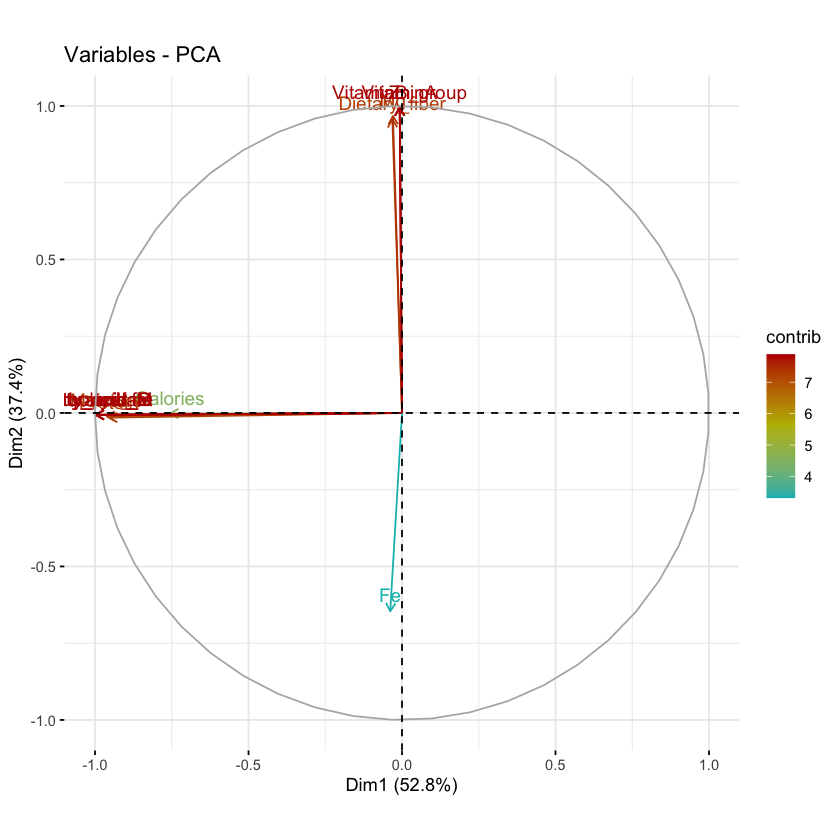

In [35]:
# 變數關係圖
fviz_pca_var(data.pca,
             col.var = "contrib",        # 依據對主成分的貢獻度上色
             #repel = TRUE,               # 避免文字重疊
             gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"))

In [36]:
# 變數相關資料
data.pca.var <- get_pca_var(data.pca)
data.pca.var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [37]:
data.pca.var$coord   # 座標

,Dim.1,Dim.2,Dim.3,Dim.4
Calories,-0.755125646,-0.002093693,0.239340107,0.60256814
Moisture,-0.962020507,-0.010789390,-0.134095873,-0.19865240
Protein,-0.954150337,-0.015327843,-0.168062370,-0.19497633
Saturated_fat,-0.997610407,-0.006136084,0.013425825,-0.01292504
Carbohydrate,-0.997611257,-0.006136056,0.013422671,-0.01293160
Dietary_fiber,-0.031615953,0.956508356,0.256475290,-0.07097114
Mg,-0.029585189,0.967049018,0.198972286,-0.04869430
Fe,-0.038336563,-0.646079135,0.717207559,-0.24332343
Zn,-0.007744724,0.994652851,0.007549119,-0.01558297
VitaminA,-0.007744724,0.994652851,0.007549119,-0.01558297


In [38]:
# 對主成分的貢獻度
data.pca.var$contrib 
aa=data.pca.var$contrib 
write.csv(aa, "feature_contribute4.csv", row.names = TRUE)

,Dim.1,Dim.2,Dim.3,Dim.4
Calories,7.720526e+00,8.371853e-05,7.908412468,71.36932948
Moisture,1.253075e+01,2.223255e-03,2.482499536,7.75687691
Protein,1.232656e+01,4.487017e-03,3.899413743,7.47245082
Saturated_fat,1.347505e+01,7.190818e-04,0.024885152,0.03283698
Carbohydrate,1.347507e+01,7.190750e-04,0.024873463,0.03287029
Dietary_fiber,1.353384e-02,1.747323e+01,9.081328935,0.99006298
Mg,1.185106e-02,1.786046e+01,5.465671528,0.46607465
Fe,1.989916e-02,7.971996e+00,71.014668652,11.63769927
Zn,8.121202e-04,1.889464e+01,0.007867756,0.04773093
VitaminA,8.121202e-04,1.889464e+01,0.007867756,0.04773093


In [39]:
# 主成分對該變數的重要性
data.pca.var$cos2    
bb=data.pca.var$cos2 
write.csv(bb, "feature_importance4.csv", row.names = TRUE)

,Dim.1,Dim.2,Dim.3,Dim.4
Calories,5.702147e-01,4.383550e-06,0.0572836870,0.3630883663
Moisture,9.254835e-01,1.164109e-04,0.0179817033,0.0394627746
Protein,9.104029e-01,2.349428e-04,0.0282449603,0.0380157692
Saturated_fat,9.952265e-01,3.765153e-05,0.0001802528,0.0001670567
Carbohydrate,9.952282e-01,3.765118e-05,0.0001801681,0.0001672262
Dietary_fiber,9.995685e-04,9.149082e-01,0.0657795741,0.0050369024
Mg,8.752834e-04,9.351838e-01,0.0395899706,0.0023711346
Fe,1.469692e-03,4.174182e-01,0.5143866823,0.0592062900
Zn,5.998075e-05,9.893343e-01,0.0000569892,0.0002428290
VitaminA,5.998075e-05,9.893343e-01,0.0000569892,0.0002428290


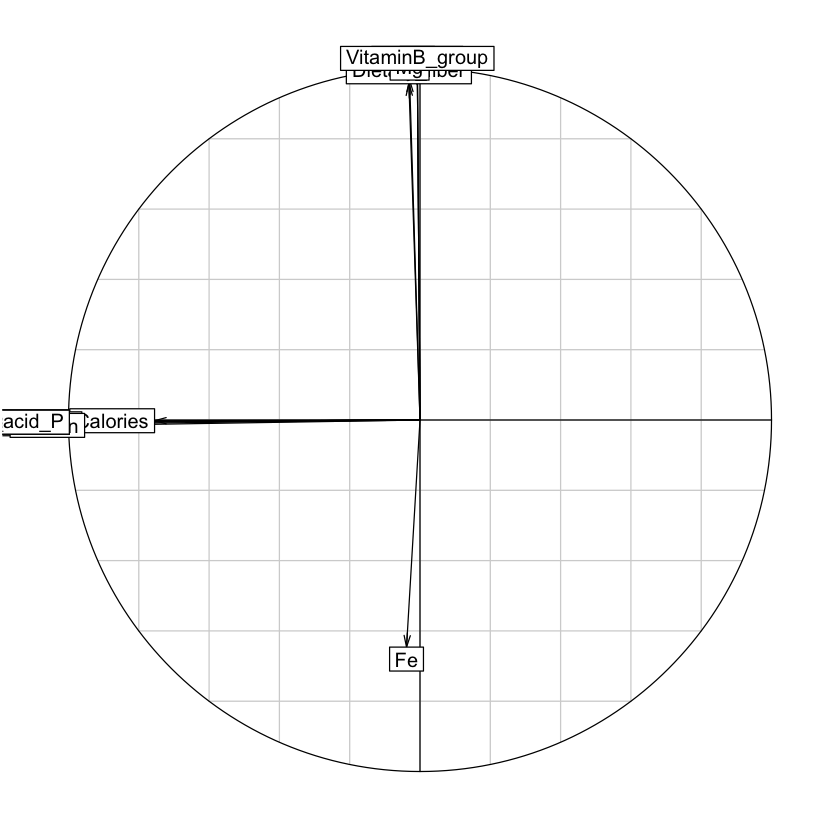

In [40]:
# 變數關係圖
s.corcircle(data.pca$co)

In [41]:
# 雙標圖（Biplot）
# fviz_pca_biplot(data.pca, repel = FALSE)

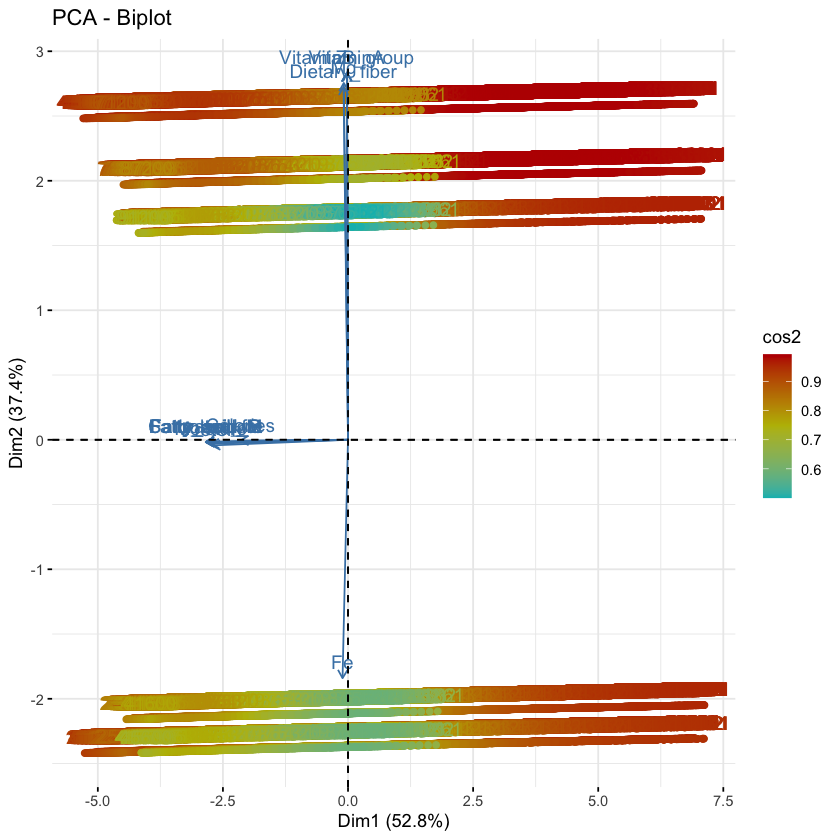

In [42]:
# 雙標圖（Biplot）
fviz_pca_biplot(data.pca,
                col.ind = "cos2",
                #repel = TRUE,
                gradient.cols = c("#00BBBB", "#BBBB00", "#BB0000"),
                repel = FALSE)

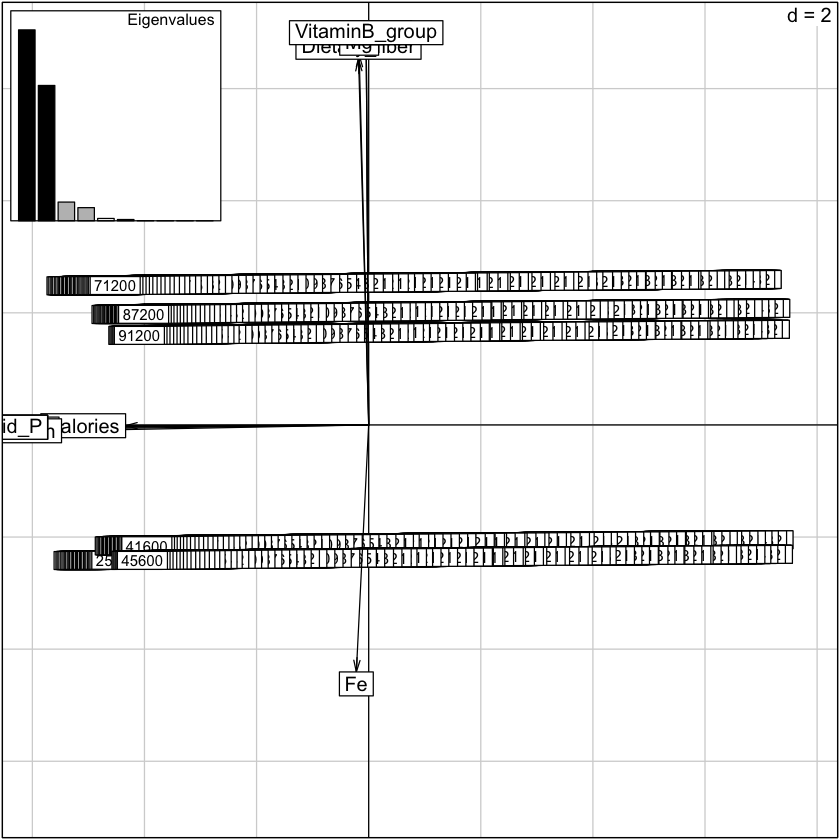

In [43]:
# 雙標圖（Biplot）
scatter(data.pca)

NULL

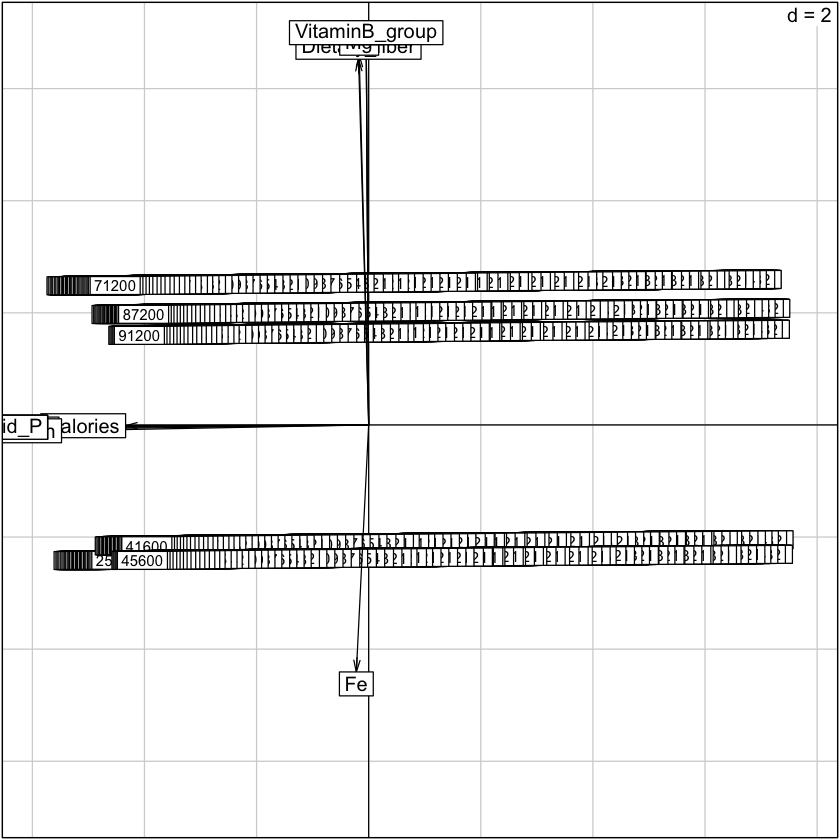

In [44]:
scatter(data.pca, posieig = "none")